In [ ]:
#import pandas
import pandas as pd
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression
# import the metrics class
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

col_names = ['Date', 'Show', 'Average', 'IMDbRating', '#Season', 'TotalSeason', 'Mean', 'label', 'Quantile']
# load dataset
df = pd.read_csv("Overall.csv", header=None, names=col_names)
df.drop(index=0,inplace=True)

#https://www.geeksforgeeks.org/what-is-the-default-threshold-in-sklearn-logistic-regression/

In [363]:
df['label'] = df['label'].map({'low':0,'high':1})
df.head()

,Date,Show,Average,IMDbRating,#Season,TotalSeason,Mean,label,Quantile
1,2004-11-01,4,47.82608695652174,0.87,1,8,low,1,normal
2,2004-12-01,6,43.08695652173913,0.87,1,8,low,0,low
3,2005-01-01,6,45.73913043478261,0.87,1,8,low,0,normal
4,2005-02-01,7,49.65217391304348,0.87,1,8,high,1,normal
5,2005-03-01,11,47.82608695652174,0.87,1,8,low,1,normal


In [364]:
#split dataset in features and target variable
feature_cols = ['Show', 'IMDbRating', '#Season', 'TotalSeason']
X = df[feature_cols] # Features
y = df.label # Target variable

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [366]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_new_threshold = (logreg.predict_proba(X_test)[:, 1] >= 0.55).astype(int) 

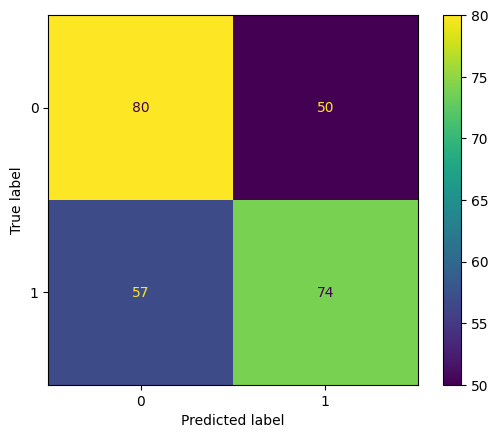

In [367]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

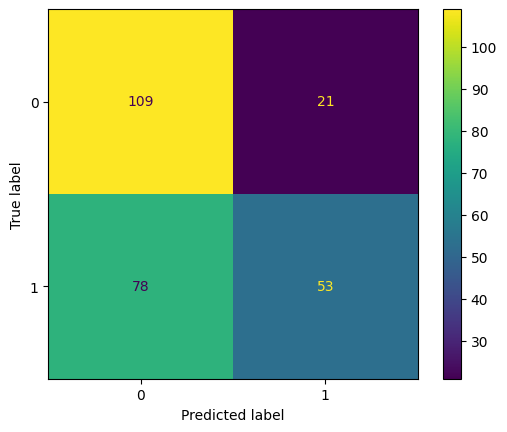

In [368]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_new_threshold)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [369]:
target_names = ['lowPopularity', 'highPopularity']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 lowPopularity       0.58      0.62      0.60       130
highPopularity       0.60      0.56      0.58       131

      accuracy                           0.59       261
     macro avg       0.59      0.59      0.59       261
  weighted avg       0.59      0.59      0.59       261



In [370]:
target_names = ['lowPopularity', 'highPopularity']
print(classification_report(y_test, y_pred_new_threshold, target_names=target_names))

                precision    recall  f1-score   support

 lowPopularity       0.58      0.84      0.69       130
highPopularity       0.72      0.40      0.52       131

      accuracy                           0.62       261
     macro avg       0.65      0.62      0.60       261
  weighted avg       0.65      0.62      0.60       261



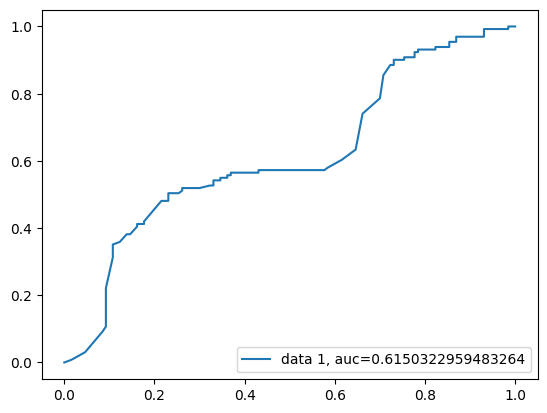

In [371]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()